In [ ]:
import numpy as np 

# data processing
import pandas as pd 


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation 
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,Sepal.length,Sepal.width,Petal.length,Petal.width,variety
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns
data.shape

(150, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal.length  150 non-null    float64
 2   Sepal.width   150 non-null    float64
 3   Petal.length  150 non-null    float64
 4   Petal.width   150 non-null    float64
 5   variety       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,Sepal.length,Sepal.width,Petal.length,Petal.width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Id,0,0.0
Sepal.length,0,0.0
Sepal.width,0,0.0
Petal.length,0,0.0
Petal.width,0,0.0


In [ ]:
#Preprocessing1-no data is missing so no missing value treatment

In [ ]:
#converting categorical into numerical
labelencoder = LabelEncoder()
data['variety']=labelencoder.fit_transform(data['variety'])
data.head()

,Id,Sepal.length,Sepal.width,Petal.length,Petal.width,variety
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
data.variety.unique()

array([0, 1, 2])

In [ ]:
data.groupby('variety').agg(['mean', 'median'])
#mean and median are evenly distributed

Id        Sepal.length        Sepal.width        Petal.length  \
          mean median         mean median        mean median         mean   
variety                                                                     
0         25.5   25.5        5.006    5.0       3.418    3.4        1.464   
1         75.5   75.5        5.936    5.9       2.770    2.8        4.260   
2        125.5  125.5        6.588    6.5       2.974    3.0        5.552   

               Petal.width         
        median        mean median  
variety                            
0         1.50       0.244    0.2  
1         4.35       1.326    1.3  
2         5.55       2.026    2.0

Text(0, 0.5, 'Count')

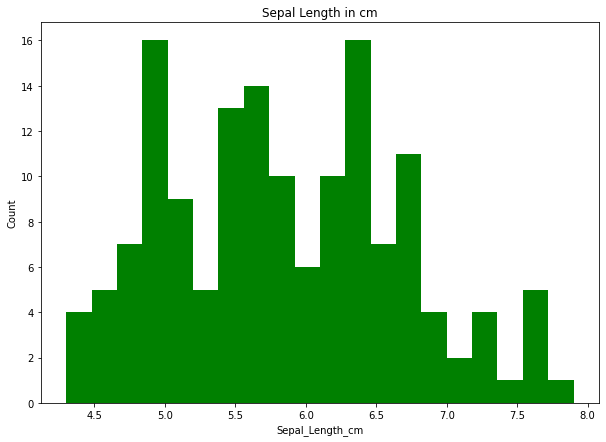

In [ ]:
#printing a histogram of sepal lenghth
plt.figure(figsize = (10, 7)) 
x = np.array(data["Sepal.length"])
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Sepal Length in cm") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 
# normal distriution

Text(0, 0.5, 'Count')

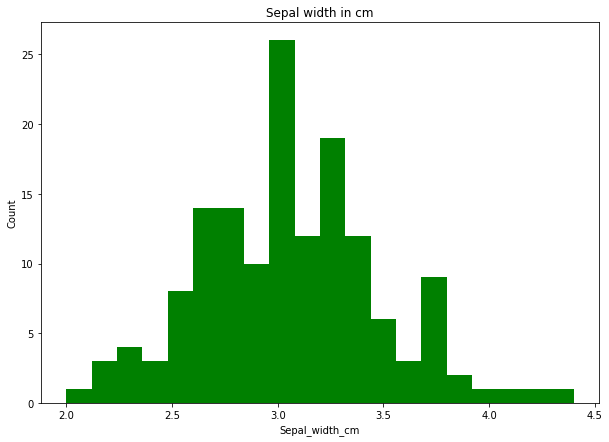

In [ ]:
plt.figure(figsize = (10, 7)) 
x = data['Sepal.width'] 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Sepal width in cm") 
plt.xlabel("Sepal_width_cm") 
plt.ylabel("Count") 
# normal distriution

Text(0, 0.5, 'Count')

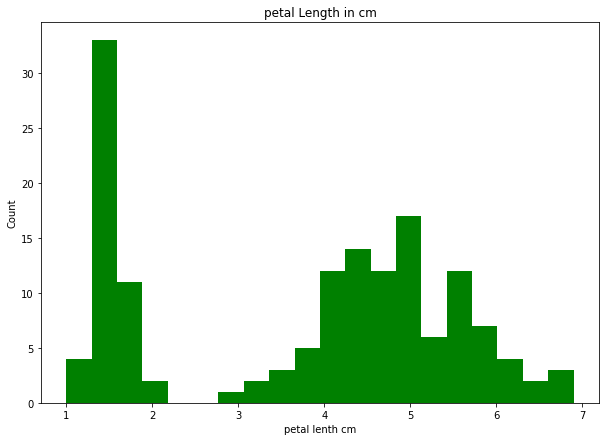

In [ ]:
plt.figure(figsize = (10, 7)) 
x = data['Petal.length'] 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("petal Length in cm") 
plt.xlabel ("petal lenth cm")
plt.ylabel("Count") 
# normal distriution

Text(0, 0.5, 'Count')

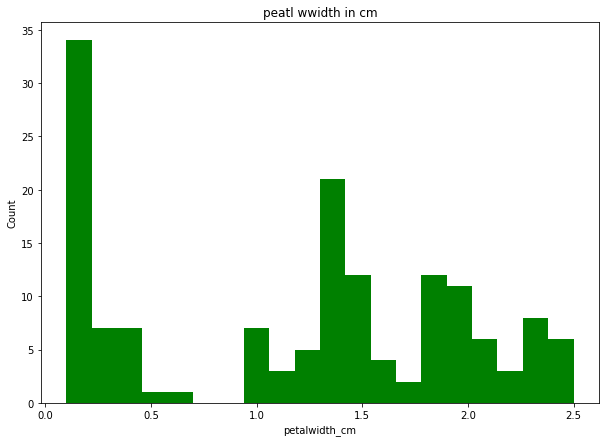

In [ ]:
plt.figure(figsize = (10, 7)) 
x = data['Petal.width'] 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("peatl wwidth in cm") 
plt.xlabel("petalwidth_cm") 
plt.ylabel("Count") 
# normal distriution

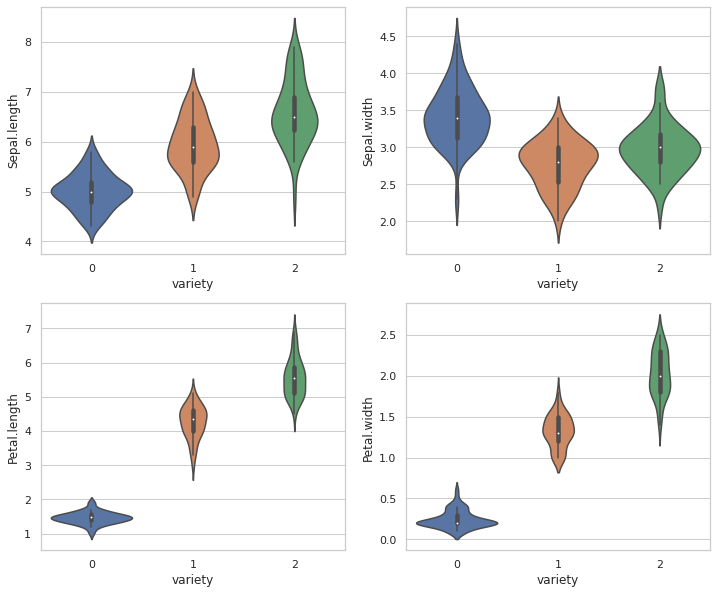

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='Sepal.length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='Sepal.width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='Petal.length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='Petal.width',data=data)
plt.show()

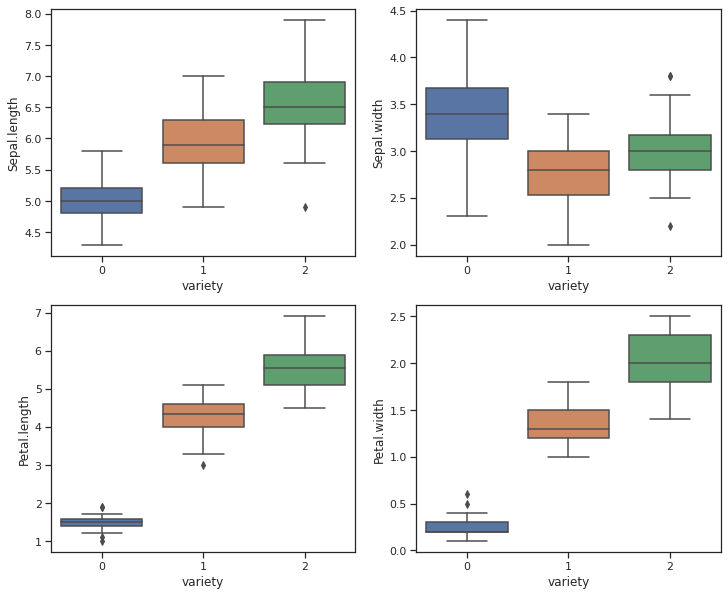

In [ ]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='variety',y='Sepal.length',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='variety',y='Sepal.width',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='variety',y='Petal.length',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='variety',y='Petal.width',data=data)
plt.show()
#outliers with respect to species

In [ ]:
#using IQR for finding outliers 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id              74.5
Sepal.length     1.3
Sepal.width      0.5
Petal.length     3.5
Petal.width      1.5
variety          2.0
dtype: float64


<AxesSubplot:>

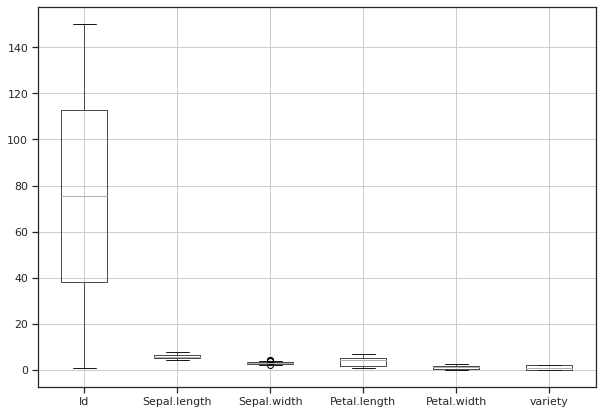

In [ ]:
plt.figure(figsize = (10, 7)) 
data.boxplot() 
#only sepal width has outlier

In [ ]:
#removing outlier
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape
#four values got removed

(146, 6)

In [ ]:
target='variety'
X=data.drop('variety',axis=1)
y=data['variety']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)




In [ ]:
#standardising data

In [ ]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.fit_transform(X_test)


In [ ]:
#principal component analysis
pca = PCA(n_components=2)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)

In [ ]:
#hyperparameters n_estimator with 90,100 ,random_state starting with 0 to 100
random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(principalComponents_train, y_train)
Y_prediction = random_forest.predict(principalComponents_train)
random_forest.score(principalComponents_train, y_train)
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(acc_random_forest)


100.0


In [ ]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      1.000     1.000     1.000        39
           2      1.000     1.000     1.000        41

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116



In [ ]:
gaussian = GaussianNB() 
gaussian.fit(principalComponents_train, y_train)  
Y_pred = gaussian.predict(principalComponents_train) 
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

98.28


In [ ]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 38,  1],
       [ 0,  1, 40]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.974     0.974     0.974        39
           2      0.976     0.976     0.976        41

    accuracy                          0.983       116
   macro avg      0.983     0.983     0.983       116
weighted avg      0.983     0.983     0.983       116



In [ ]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(acc_log)

99.14


In [ ]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  1, 40]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.975     1.000     0.987        39
           2      1.000     0.976     0.988        41

    accuracy                          0.991       116
   macro avg      0.992     0.992     0.992       116
weighted avg      0.992     0.991     0.991       116



In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,y_train)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(acc_dt)

100.0


In [ ]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      1.000     1.000     1.000        39
           2      1.000     1.000     1.000        41

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116



In [ ]:
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(acc_svc)



96.55


In [ ]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 36,  3],
       [ 0,  1, 40]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.973     0.923     0.947        39
           2      0.930     0.976     0.952        41

    accuracy                          0.966       116
   macro avg      0.968     0.966     0.967       116
weighted avg      0.966     0.966     0.965       116



Text(0, 0.5, 'True Positive Rate (TPR)')

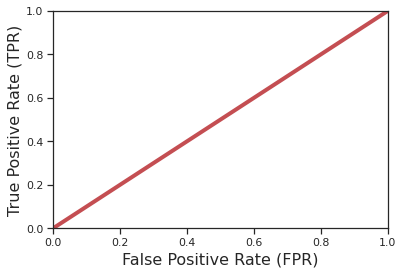

In [ ]:
from sklearn.metrics import roc_curve
y_scores = random_forest.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)

Text(0, 0.5, 'True Positive Rate (TPR)')

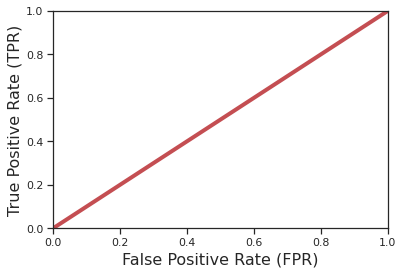

In [ ]:
from sklearn.metrics import roc_curve
y_scores = decisiontree.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [ ]:
y_true=predictions

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
Random Forest,100.00
Decision Tree,100.00
Logistic Regression,99.14
gaussian,98.28
LinearSVC,96.55
